# INTRODUCTION

Nous allons dans ce notebook tenter de detecter si un patient peut etre atteint de maladie cardiaque ou pas. Pour cela nous allons utiliser 4 algorithmes (Regression Logistic, RandomForest, SVC et KNN) et les comparer afin d'obtenir le meilleur modele

# LIBRAIRIES

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.model_selection import cross_val_score, train_test_split
import scipy.stats as ss
from sklearn import feature_selection as fs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# DATASET

In [2]:
mc= pd.read_csv('heart-disease-uci/heart.csv')
mc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
mc.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

3 age: age in years
4 sex: sex (1 = male; 0 = female)
9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
12 chol: serum cholestoral in mg/dl
16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
32 thalach: maximum heart rate achieved
38 exang: exercise induced angina (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest
41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
44 ca: number of major vessels (0-3) colored by flourosopy
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

L'angine de poitrine Écouter, ou angor (en latin : angina pectoris ou angor pectoris, « constriction de la poitrine »), est un symptôme cardiaque caractérisant la maladie coronarienne et se manifestant par une douleur thoracique résultant d'un manque d'apport d'oxygène au myocarde, le plus souvent consécutive à une diminution du débit sanguin dans une artère coronaire (on parle de sténose coronarienne). Ce manque d'oxygène au niveau du cœur est appelé ischémie du myocarde. L'angine de poitrine est un symptôme commun mais inconstant de l'ischémie du myocarde : cette douleur survient typiquement lors d'un effort et cesse à l'arrêt de ce dernier. C'est ce qui peut aider à distinguer l'angine des autres types de douleurs thoraciques. 

In electrocardiography, the ST segment connects the QRS complex and the T wave and has a duration of 0.005 to 0.150 sec (5 to 150 ms).

It starts at the J point (junction between the QRS complex and ST segment) and ends at the beginning of the T wave. However, since it is usually difficult to determine exactly where the ST segment ends and the T wave begins, the relationship between the ST segment and T wave should be examined together. The typical ST segment duration is usually around 0.08 sec (80 ms). It should be essentially level with the PR and TP segments.

The ST segment represents the isoelectric period when the ventricles are in between depolarization and repolarization.
Interpretation

    The normal ST segment has a slight upward concavity.
    Flat, downsloping, or depressed ST segments may indicate coronary ischemia.
    ST elevation may indicate transmural myocardial infarction. An elevation of >1mm and longer than 80 milliseconds following the J-point. This measure has a false positive rate of 15-20% (which is slightly higher in women than men) and a false negative rate of 20-30%.[1]
    ST depression may be associated with subendocardial myocardial infarction, hypokalemia, or digitalis toxicity.[2]

In [4]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
mc.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
mc.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
mc.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
mc.target.value_counts()

1    165
0    138
Name: target, dtype: int64

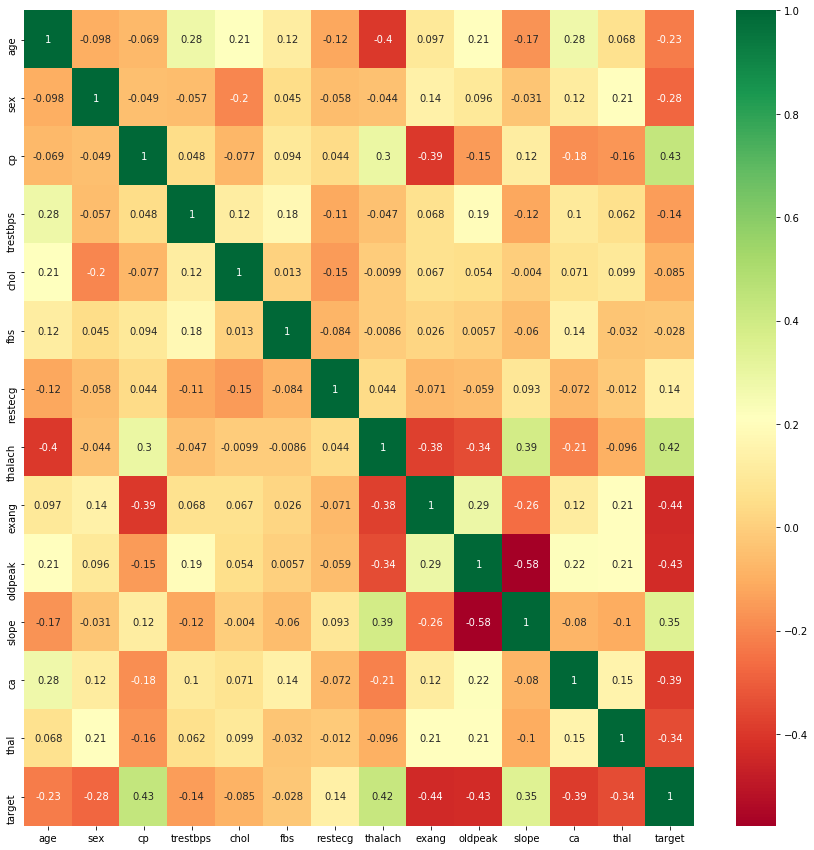

In [9]:
#Matrice de correlation
plt.figure(figsize=(15,15))
hm= sns.heatmap(mc.corr(), annot= True, cmap= "RdYlGn")

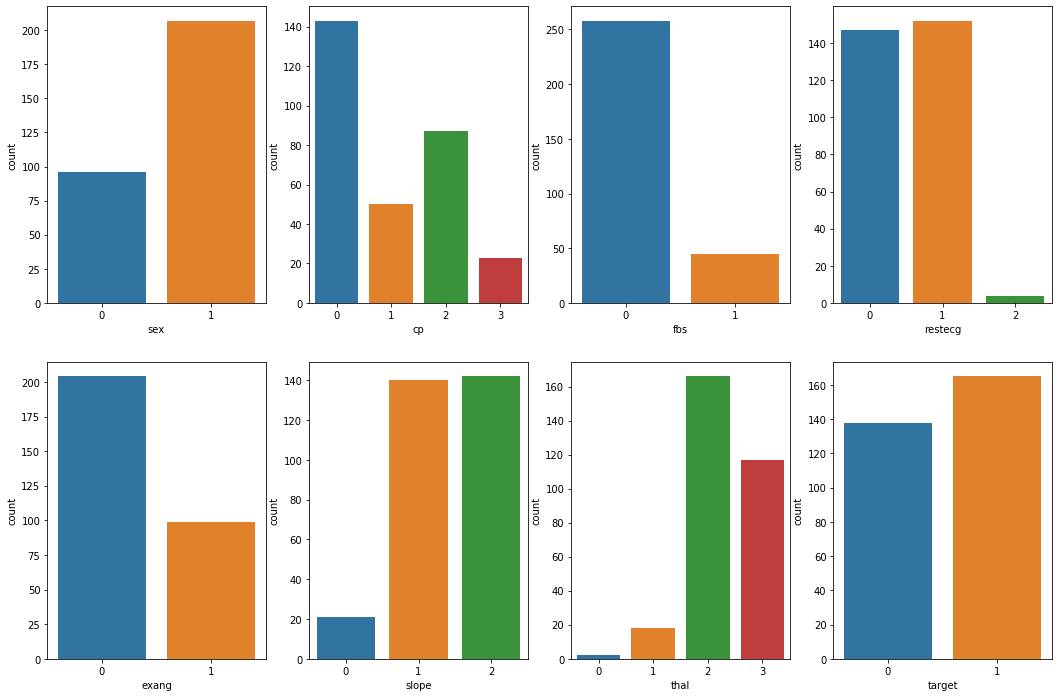

In [10]:
#Effectifs pour chaque categorie
categories = ['sex', 'cp', 'fbs', 'restecg',
       'exang', 'slope', 'thal', 'target']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
for col, ax in zip(categories, axs.ravel()):
    sns.countplot(x=col, data=mc, ax=ax)

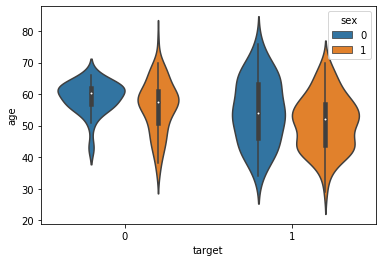

In [11]:
sns.violinplot(x='target', y='age', hue='sex',data=mc)

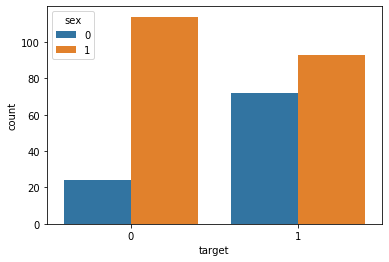

In [12]:
sns.countplot(x='target', hue='sex', data=mc)

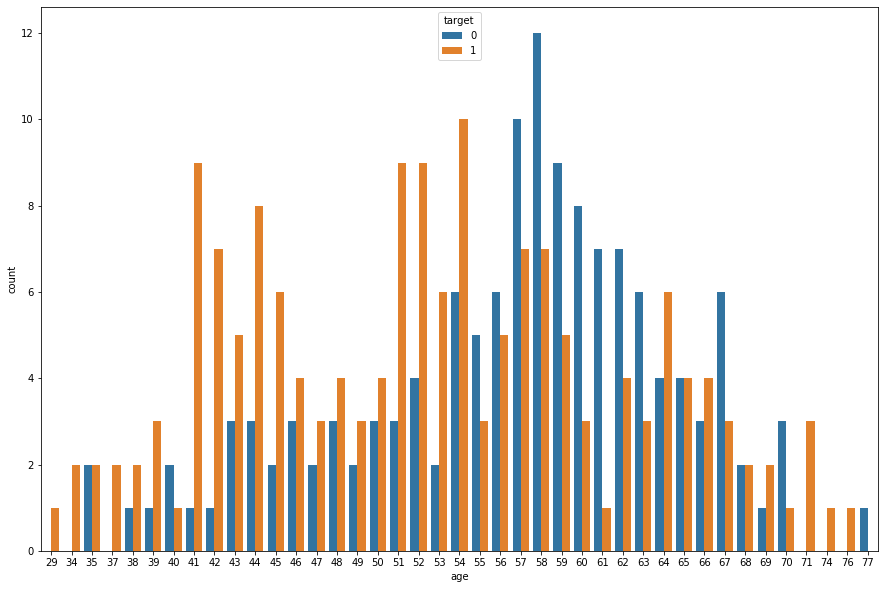

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='age', hue='target', data=mc)

# FEATURE ENGINEERING

In [14]:
categorical_columns = ['sex','cp', 'fbs', 'restecg','exang','slope', 'thal']
mc = pd.get_dummies(mc, columns=categorical_columns)
mc.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [15]:
Label = np.array(mc['target'])
Features= np.array(mc.drop(['target'], axis=1))
Features.shape

(303, 26)

In [16]:
#mc.to_csv('tabfinal.csv', index=False)

In [17]:
Features

array([[ 63., 145., 233., ...,   1.,   0.,   0.],
       [ 37., 130., 250., ...,   0.,   1.,   0.],
       [ 41., 130., 204., ...,   0.,   1.,   0.],
       ...,
       [ 68., 144., 193., ...,   0.,   0.,   1.],
       [ 57., 130., 131., ...,   0.,   0.,   1.],
       [ 57., 130., 236., ...,   0.,   1.,   0.]])

In [18]:
#Normalisation
scaler = preprocessing.StandardScaler()
scaler.fit(Features[:,:5])
Features[:, :5] = scaler.transform(Features[:, :5])
Features

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

In [27]:
print(Features.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(303, 26)
[ True  True  True  True  True  True  True  True  True False  True False
 False False  True  True False  True  True False  True  True False False
  True  True]
(303, 18)


In [19]:
#lien entre age et thalach, lien entre thalach et oldpeak

In [44]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features_reduced, Label, test_size= 0.2, random_state=42)

# MODELES

## REGRESSION LOGISTIQUE

In [45]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred_lr = clf_lr.predict(X_test)

In [47]:
cm_lr = sklm.confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[27,  2],
       [ 4, 28]], dtype=int64)

In [48]:
score_lr= sklm.classification_report(y_test, y_pred_lr)
print(score_lr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [49]:
print('Accuracy du test set pour lr = {}'.format((cm_lr[0][0] + cm_lr[1][1])/len(y_test)))

Accuracy du test set pour lr = 0.9016393442622951


## SVC

In [50]:
clf_svc= SVC(kernel='linear')
clf_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred_svc= clf_svc.predict(X_test)
cm_svc = sklm.confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [52]:
score_svc= sklm.classification_report(y_test, y_pred_svc)
print(score_svc)
print('Accuracy du test set pour svc = {}'.format((cm_svc[0][0] + cm_svc[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy du test set pour svc = 0.8688524590163934


In [53]:
clf_ksvc= SVC(kernel='rbf')
clf_ksvc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
y_pred_ksvc= clf_ksvc.predict(X_test)
cm_ksvc = sklm.confusion_matrix(y_test, y_pred_ksvc)
cm_ksvc

array([[27,  2],
       [ 4, 28]], dtype=int64)

In [55]:
score_ksvc= sklm.classification_report(y_test, y_pred_ksvc)
print(score_ksvc)
print('Accuracy du test set pour ksvc = {}'.format((cm_ksvc[0][0] + cm_ksvc[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy du test set pour ksvc = 0.9016393442622951


## RANDOM FOREST

In [56]:
clf_rf= RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [57]:
y_pred_rf= clf_svc.predict(X_test)
cm_rf = sklm.confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[26,  3],
       [ 5, 27]], dtype=int64)

In [58]:
score_rf= sklm.classification_report(y_test, y_pred_rf)
print(score_rf)
print('Accuracy du test set pour rf = {}'.format((cm_rf[0][0] + cm_rf[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy du test set pour rf = 0.8688524590163934


## KNN

In [60]:
clf_knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
y_pred_knn= clf_knn.predict(X_test)
cm_knn = sklm.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [62]:
score_knn= sklm.classification_report(y_test, y_pred_knn)
print(score_knn)
print('Accuracy du test set pour knn = {}'.format((cm_knn[0][0] + cm_knn[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy du test set pour knn = 0.8688524590163934


In [63]:
knn_classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [64]:
y_pred_best_knn= knn_classifier.predict(X_test)
cm_best_knn = sklm.confusion_matrix(y_test, y_pred_best_knn)
cm_best_knn

array([[27,  2],
       [ 3, 29]], dtype=int64)

In [65]:
score_best_knn= sklm.classification_report(y_test, y_pred_best_knn)
print(score_best_knn)
print('Accuracy du test set pour best_knn = {}'.format((cm_best_knn[0][0] + cm_best_knn[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Accuracy du test set pour best_knn = 0.9180327868852459


In [90]:
import pickle
pickle.dump(knn_classifier, open('knn_model.pkl','wb'))

In [46]:
#from sklearn.model_selection import cross_val_score
# bestk_scores = []
# for k in range(1,21):
#     best_k = KNeighborsClassifier(n_neighbors = k)
#     score=cross_val_score(best_k,X_train,y_train,cv=10)
#     bestk_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

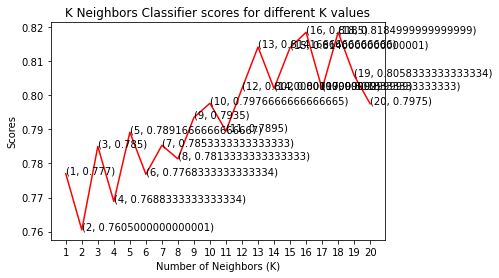

In [48]:


# plt.plot([k for k in range(1, 21)], bestk_scores, color = 'red')
# for i in range(1,21):
#     plt.text(i, bestk_scores[i-1], (i, bestk_scores[i-1]))
# plt.xticks([i for i in range(1, 21)])
# plt.xlabel('Number of Neighbors (K)')
# plt.ylabel('Scores')
# plt.title('K Neighbors Classifier scores for different K values')

In [12]:
import time
from threading import Thread

answer = None

def check():
    time.sleep(20)
    if answer != None:
        return
    print( "Trop lent Wesh, reponds!")

Thread(target = check).start()

answer = input("Bot: Yo! ")


Trop lent Wesh, reponds!
Bot: Yo! bbbbb


In [80]:
test = pd.read_csv('tabfinal.csv')
test.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
test.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [82]:
x= ['59', '1', '0', '170', '326', '0', '0', '140', '1', '3.4', '0', '0', '3']

In [83]:
test['age'] = x[0]
test['sex_0'] = np.where(x[1]== '0',  1, test['sex_0'])
test['sex_1'] = np.where(x[1]== '1', 1, test['sex_1'])
test['cp_0'] = np.where(x[2]=='0', 1, test['cp_0'])
test['cp_1'] = np.where(x[2]=='1', 1, test['cp_1'])
test['cp_2'] = np.where(x[2]=='2', 1, test['cp_2'])
test['cp_3'] = np.where(x[2]=='3', 1, test['cp_3'])
test['trestbps']= x[3]
test['chol'] = x[4]
test['fbs_0'] = np.where(x[5]=='0', 1, test['fbs_0'])
test['fbs_1'] = np.where(x[5]=='1', 1, test['fbs_1'])
test['restecg_0'] = np.where(x[6]== '0', 1, test['restecg_0'])
test['restecg_1'] = np.where(x[6]== '1', 1, test['restecg_1'])
test['restecg_2'] = np.where(x[6]== '2', 1, test['restecg_2'])
test['thalach'] = x[7]
test['exang_0'] = np.where(x[8]== '0', 1, test['exang_0'])
test['exang_1'] = np.where(x[8]== '1', 1, test['exang_1'])
test['oldpeak'] = x[9]
test['slope_0'] = np.where(x[10]== '0', 1, test['slope_0'])
test['slope_1'] = np.where(x[10]== '1', 1, test['slope_1'])
test['slope_2'] = np.where(x[10]== '2', 1, test['slope_2'])
test['ca']= x[11]
test['thal_0']= np.where(x[12]=='0', 1, test['thal_0'])
test['thal_1']= np.where(x[12]=='1', 1, test['thal_1'])
test['thal_2']= np.where(x[12]=='2', 1, test['thal_2'])
test['thal_3']= np.where(x[12]=='3', 1, test['thal_3'])


test.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,59,170,326,140,3.4,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1


In [84]:
#test en array
test= np.array(test)
#Normalisation test
scaler_test = preprocessing.StandardScaler()
scaler_test.fit(test[:,:5])
test[:, :5] = scaler.transform(test[:, :5])
test

array([[0.5110412953376136, 2.1917783621645257, 1.5409361464854159,
        -0.4218622636428049, 2.0363031719943865, '0', 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]], dtype=object)

In [85]:
# print(test.shape)

# ## Define the variance threhold and fit the threshold to the feature array. 
# sel_test = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
# test_reduced = sel_test.fit_transform(test)

# ## Print the support and shape for the transformed features
# print(sel_test.get_support())
# print(test_reduced.shape)

In [86]:
test= np.delete(test, 9)
test= np.delete(test,10)
test= np.delete(test,10)
test= np.delete(test,10)
test= np.delete(test,12)
test= np.delete(test,14)
test= np.delete(test,16)
test= np.delete(test,16)

# del test[10]
# del test[10]
# del test[12]
# del test[14]
# del test[16]
# del test[16]
test

array([0.5110412953376136, 2.1917783621645257, 1.5409361464854159,
       -0.4218622636428049, 2.0363031719943865, '0', 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1], dtype=object)

In [87]:
test.shape

(18,)

In [88]:
test= test.reshape(1,-1)
pred_test= knn_classifier.predict(test)

In [89]:
pred_test

array([0], dtype=int64)

In [34]:
del a[9]
del a[10]
del a[10]
del a[10]
del a[12]
del a[14]
del a[16]
del a[16]
a


['1',
 '12',
 '14',
 '22',
 '26',
 '33',
 '44',
 '55',
 '66',
 '88',
 '7',
 '2',
 '6',
 '0',
 '25',
 '35',
 '75',
 '85']